# Main libraries imported

In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sb
import numpy as np
import datetime as dt
import json
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import mannwhitneyu
import scipy
import scipy.io
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import os as os
import quantstats as qs
%matplotlib inline
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

import warnings
warnings.filterwarnings("ignore")

# Functions 

In [2]:
def convert_datetime(t): # Transforms datetimes into values we can work with
    split = [int(i) for i in str(t)]
    
    DD = str(split[0]) + str(split[1])
    MM = str(split[2]) + str(split[3])
    YY = str(split[4]) + str(split[5])+ str(split[6])+ str(split[7])
    hh = str(split[8]) + str(split[9])
    mm = str(split[10]) + str(split[11])
    ss = str(split[12]) + str(split[13])
    
    date = MM + '/' + DD + '/' + YY + " " + hh + ':' + mm + ':' + ss
    datetime = dt.datetime.strptime(date, '%m/%d/%Y %H:%M:%S')
    return datetime

# Reading files

In [3]:
# Reading Android files

DF_list = [] # Array of Dataframes, each one contains one experimental session
DF = pd.DataFrame()
datapath = 'C:\\Users\\katherine\\Desktop\\MASTER THESIS\\DATOS\\Reales\\Archivos de datos\\Android\\' #Directory
for item in os.listdir(datapath):
    if item[-4:] == 'xlsx': # Only read those files from the directory which are excel files
        print(item)
        DF = pd.read_excel(datapath + item, converters={'t':str}, usecols ="A,B,D,F:H")#, keep_default_na = False)#, index_col = 0)
        for row in range(len(DF['t'])):
            DF.loc[row,'t'] = convert_datetime(DF.loc[row,'t'])
        DF = DF.set_index('patient_id')
    DF_list.append(DF) ## Add the dataframe to the Dataframe array
DF_Android_all = pd.concat(DF_list) #, ignore_index=True)
# El DF_all te devolvería un dataframe donde están todos los que has leído concatenados en un único dataframe
# Sobre este podrías hacer el análisis

print("Items Read")

79001.xlsx
79002.xlsx
79003.xlsx
79004.xlsx
79005.xlsx
79006.xlsx
79007.xlsx
79008.xlsx
79009.xlsx
79010.xlsx
Items Read


In [4]:
# Reading Android files

DF_list = [] # Array of Dataframes, each one contains one experimental session
DF = pd.DataFrame()
datapath = 'C:\\Users\\katherine\\Desktop\\MASTER THESIS\\DATOS\\Reales\\Archivos de datos\\iOS\\' #Directory
for item in os.listdir(datapath):
    if item[-4:] == 'xlsx': # Only read those files from the directory which are excel files
        print(item)
        DF = pd.read_excel(datapath + item, converters={'t':str}, usecols ="A,B,F:I")#, keep_default_na = False)#, index_col = 0)
        for row in range(len(DF['t'])):
            DF.loc[row,'t'] = convert_datetime(DF.loc[row,'t'])
        DF = DF.set_index('patient_id')
    DF_list.append(DF) ## Add the dataframe to the Dataframe array
DF_iOS_all = pd.concat(DF_list) #ignore_index=True)
# El DF_iOS_all te devolvería un dataframe donde están todos los que has leído concatenados en un único dataframe
# Sobre este podrías hacer el análisis

print("Items Read")

20001.xlsx
20002.xlsx
20003.xlsx
20501.xlsx
20502.xlsx
20503.xlsx
20504.xlsx
20505.xlsx
20506.xlsx
20507.xlsx
Items Read


# Participants

In [5]:
subjects_file = 'C:\\Users\\katherine\\Desktop\\MASTER THESIS\\DATOS\\Reales\\Participants_summary.xlsx'
DF_participants = pd.read_excel(subjects_file, index_col = 0)
DF_participants

,participant_id,Gender,Age,Type,Sessions,System,File name
Subject,,,,,,,
1,79001,Female,21,healthy,1,Android,79001
2,79002,Male,28,healthy,2,Android,79002
3,79003,Male,29,healthy,1,Android,79003
4,79004,Female,49,healthy,2,Android,79004
5,79005,Male,54,healthy,2,Android,79005
6,79006,Female,18,healthy,2,Android,79006
7,79007,Male,22,healthy,2,Android,79007
8,79008,Male,30,healthy,2,Android,79008
9,79009,Female,24,healthy,2,Android,79009


In [6]:
DF_participants.groupby(['Gender']).count()

,participant_id,Age,Type,Sessions,System,File name
Gender,,,,,,
Female,6,6,6,6,6,6
Male,8,8,8,8,8,8


# Exploring data

## Android 

In [7]:
DF_Android_all = DF_Android_all[['Activity level','a','a_raw','s', 't']] # Ordena las columnas
DF_Android_all
#DF_all.head()

,Activity level,a,a_raw,s,t
patient_id,,,,,
79001,1,0.385824,0.385824,0,2021-05-19 18:51:48
79001,1,0.439247,0.439247,0,2021-05-19 18:52:47
79001,1,0.310032,0.310032,0,2021-05-19 18:53:47
79001,1,0.358969,0.358969,0,2021-05-19 18:54:47
79001,1,0.284155,0.284155,0,2021-05-19 18:55:48
...,...,...,...,...,...
79010,4,0.167875,5.174772,121,2021-07-10 12:58:08
79010,4,0.575343,5.135343,114,2021-07-10 12:59:08
79010,4,0.854534,5.294535,111,2021-07-10 13:00:08


### METHOD OF CORRECTION

1. Filtering only walking data
2. Add the new variable 'w_swing' without taking into account steps = 0
3. Calculate the means of values of w_swing for each subject
4. Apply the formula to add the new variable 'a_corrected' to all DF

In [8]:
# Choosing only data when walking
DF_Android_walking = DF_Android_all[DF_Android_all['Activity level'] == 4]

# Adding the new column [w_swing]
DF_Android_walking_w_swing = DF_Android_walking.assign(w_swing = DF_Android_walking['a_raw'].div(DF_Android_walking['s']))
DF_Android_walking_w_swing.replace([np.inf, -np.inf], 0, inplace = True)

# Getting the means of w_swing for each subject
DF_Android_w_swing_means = DF_Android_walking_w_swing.groupby(['patient_id'])['w_swing'].mean()
                                                              
# Apply the formula to get 'a_corrected' of all data                                                              
DF_Android_completed = DF_Android_all.assign(a_corrected = DF_Android_all['a_raw'] - DF_Android_all['s'] * DF_Android_w_swing_means)
DF_Android_completed        

,Activity level,a,a_raw,s,t,a_corrected
patient_id,,,,,,
79001,1,0.385824,0.385824,0,2021-05-19 18:51:48,0.385824
79001,1,0.439247,0.439247,0,2021-05-19 18:52:47,0.439247
79001,1,0.310032,0.310032,0,2021-05-19 18:53:47,0.310032
79001,1,0.358969,0.358969,0,2021-05-19 18:54:47,0.358969
79001,1,0.284155,0.284155,0,2021-05-19 18:55:48,0.284155
...,...,...,...,...,...,...
79010,4,0.167875,5.174772,121,2021-07-10 12:58:08,-0.154504
79010,4,0.575343,5.135343,114,2021-07-10 12:59:08,0.114372
79010,4,0.854534,5.294535,111,2021-07-10 13:00:08,0.405694


In [9]:
# Choosing only data when walking for analysis
DF_Android_completed_walking = DF_Android_completed[DF_Android_completed['Activity level'] == 4]
DF_Android_completed_walking

,Activity level,a,a_raw,s,t,a_corrected
patient_id,,,,,,
79001,4,0.000000,4.077534,116,2021-05-19 19:20:48,-0.182849
79001,4,0.000000,3.862894,112,2021-05-19 19:21:48,-0.250580
79001,4,0.000000,4.133017,117,2021-05-19 19:22:48,-0.164094
79001,4,0.000000,4.039679,127,2021-05-19 19:23:48,-0.624706
79001,4,0.000000,3.351093,115,2021-05-19 19:24:48,-0.872563
...,...,...,...,...,...,...
79010,4,0.167875,5.174772,121,2021-07-10 12:58:08,-0.154504
79010,4,0.575343,5.135343,114,2021-07-10 12:59:08,0.114372
79010,4,0.854534,5.294535,111,2021-07-10 13:00:08,0.405694


### Some plots

COMPARACIÓN RAW ARM USE, ARM USE Y CORRECTED ARM USE (a_raw VS a VS a_corrected)

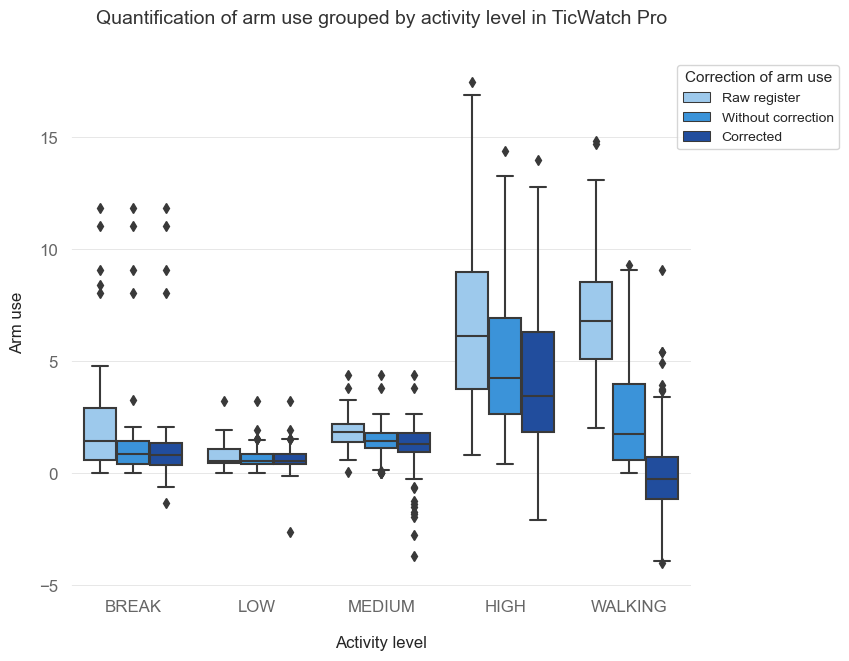

In [10]:
# CREA UN NUEVO DF CON UN NUEVO ORDENAN DE LOS DATOS PARA PODER REPRESENTARLOS DE FORMA ADECUADA EN UN BOXPLOT
# Raw data
DF_Android_completed_1 = DF_Android_completed[['Activity level', 's', 'a_raw']]
DF_Android_completed_1.rename(columns={'a_raw': 'arm_use'}, inplace=True)
DF_Android_completed_1['a_correction'] = ['Raw register' for x in range(len(DF_Android_completed['a_raw']))]
# System adjustment
DF_Android_completed_2 = DF_Android_completed[['Activity level', 's', 'a']]
DF_Android_completed_2.rename(columns={'a': 'arm_use'}, inplace=True)
DF_Android_completed_2['a_correction'] = ['Without correction' for x in range(len(DF_Android_completed['a']))]
# New correction
DF_Android_completed_3 = DF_Android_completed[['Activity level', 's', 'a_corrected']]
DF_Android_completed_3.rename(columns={'a_corrected': 'arm_use'}, inplace=True)
DF_Android_completed_3['a_correction'] = ['Corrected' for x in range(len(DF_Android_completed['a_corrected']))]
# Se junta cada parte en un mismo dataframe
DF_Android_arm_use_3_stage_graf = pd.concat([DF_Android_completed_1, DF_Android_completed_2,DF_Android_completed_3])

DF_Android_arm_use_3_stage_graf.loc[DF_Android_arm_use_3_stage_graf['Activity level'] == 0, 'Activity level'] = "BREAK"
DF_Android_arm_use_3_stage_graf.loc[DF_Android_arm_use_3_stage_graf['Activity level'] == 1, 'Activity level'] = "LOW"
DF_Android_arm_use_3_stage_graf.loc[DF_Android_arm_use_3_stage_graf['Activity level'] == 2, 'Activity level'] = "MEDIUM"
DF_Android_arm_use_3_stage_graf.loc[DF_Android_arm_use_3_stage_graf['Activity level'] == 3, 'Activity level'] = "HIGH"
DF_Android_arm_use_3_stage_graf.loc[DF_Android_arm_use_3_stage_graf['Activity level'] == 4, 'Activity level'] = "WALKING"

#GRAFICO
plt.figure(figsize=(8, 7), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#90CAF9', '#2196F3', '#0D47B1'] #COLORES Azul claro y oscuro

boxplot_arm_use = sb.boxplot(x='Activity level', y = 'arm_use',data = DF_Android_arm_use_3_stage_graf, hue = 'a_correction',hue_order = ["Raw register", "Without correction", "Corrected"], order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors)
sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

boxplot_arm_use.axes.set_title("Quantification of arm use grouped by activity level in TicWatch Pro", fontsize=14, y = 1.05)
boxplot_arm_use.set_xlabel("Activity level",labelpad = 15, fontsize=12)
boxplot_arm_use.set_ylabel("Arm use", labelpad = 10, fontsize=12)

#plt.setp(boxplot_arm_use.get_legend().get_texts(), fontsize='12') # for legend text
plt.legend(title = "Correction of arm use", fontsize = "10", title_fontsize = "11",bbox_to_anchor=(1.25, 1.0), loc = 'upper right')

#quantiles_Android_arm_use_3_stage = pd.DataFrame(DF_Android_arm_use_3_stage_graf.groupby(['Activity level','a_correction'])['arm_use'].quantile([0, 0.25,0.5,0.75,1]))
#quantiles_Android_arm_use_3_stage

#DATAFRAME DEL GRÁFICO
#DF_Android_arm_use_3_stage_graf

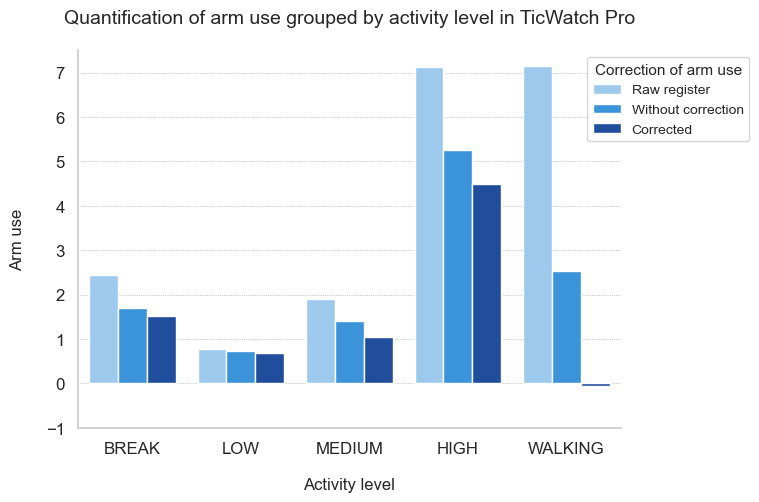

In [11]:
DF_Android_arm_use_3_stage_graf_mean = DF_Android_arm_use_3_stage_graf.groupby(['a_correction','Activity level'])['arm_use'].mean().reset_index()
#DF_Android_completed_graf_bar_3_stage['Activity level'] = pd.Categorical(DF_Android_completed_graf_bar_3_stage['Activity level'], categories=['BREAK','LOW','MEDIUM','HIGH','WALKING'], ordered=True)

plt.figure(figsize=(7, 5), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#90CAF9', '#2196F3', '#0D47B1'] #COLORES Azul claro y oscuro

barplot_arm_use = sb.barplot(x = 'Activity level', y = 'arm_use', data = DF_Android_arm_use_3_stage_graf_mean, hue = 'a_correction', hue_order = ["Raw register","Without correction", "Corrected"], order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors)
#sb.lineplot(x = 'Activity level', y = 'arm_use', data = DF_Android_arm_use_3_stage_graf_mean, hue = 'a_correction', hue_order = ["Raw register", "Without correction", "Corrected"], palette = colors, legend = False)

sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks)

barplot_arm_use.axes.set_title("Quantification of arm use grouped by activity level in TicWatch Pro", fontsize=14, y =1.05)
barplot_arm_use.set_xlabel("Activity level", labelpad = 15, fontsize=12)
barplot_arm_use.set_ylabel("Arm use", labelpad = 15, fontsize=12)
barplot_arm_use.axis(ymin=-1)

plt.legend(title = "Correction of arm use", fontsize = "10", title_fontsize = "11", bbox_to_anchor=(1.25, 1.0), loc = 'upper right')

#DATAFRAME DEL GRÁFICO
#DF_Android_arm_use_3_stage_graf_mean

STEPS REGISTERED BY ACTIVITY LEVEL

Text(0, 0.5, 'steps / min')

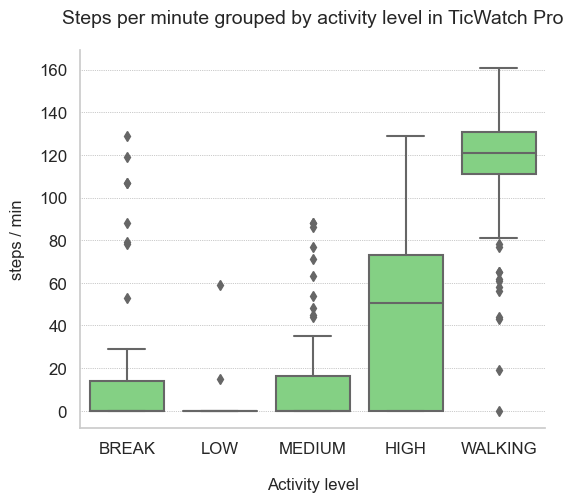

In [12]:
DF_Android_completed_graf_s = DF_Android_completed.copy()
DF_Android_completed_graf_s.loc[DF_Android_completed_graf_s['Activity level'] == 0, 'Activity level'] = "BREAK"
DF_Android_completed_graf_s.loc[DF_Android_completed_graf_s['Activity level'] == 1, 'Activity level'] = "LOW"
DF_Android_completed_graf_s.loc[DF_Android_completed_graf_s['Activity level'] == 2, 'Activity level'] = "MEDIUM"
DF_Android_completed_graf_s.loc[DF_Android_completed_graf_s['Activity level'] == 3, 'Activity level'] = "HIGH"
DF_Android_completed_graf_s.loc[DF_Android_completed_graf_s['Activity level'] == 4, 'Activity level'] = "WALKING"


colors = ['#77DD77','#77DD77','#77DD77','#77DD77','#77DD77']
plt.figure(figsize=(6, 5), dpi = 100)
boxplot_steps = sb.boxplot(x='Activity level', y='s', data = DF_Android_completed_graf_s, order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors )
#boxplot_steps.axis(ymin=-100, ymax=180);
sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks
boxplot_steps.axes.set_title("Steps per minute grouped by activity level in TicWatch Pro", fontsize=14, y = 1.05)
boxplot_steps.set_xlabel("Activity level",labelpad = 15, fontsize=12)
boxplot_steps.set_ylabel("steps / min", labelpad = 10,fontsize=12)

#quantiles_steps_min = pd.DataFrame(DF_Android_completed_graf_s.groupby(['Activity level'])['s'].quantile([0, 0.25,0.5,0.75,1]))
#quantiles_steps_min

DISPERSION PLOT BETWEEN QUANTIFICATION OF ARM USE

,Activity level,s,arm_use,a_correction
patient_id,,,,
79001,WALKING,116,4.077534,Raw register
79001,WALKING,112,3.862894,Raw register
79001,WALKING,117,4.133017,Raw register
79001,WALKING,127,4.039679,Raw register
79001,WALKING,115,3.351093,Raw register
...,...,...,...,...
79010,WALKING,121,-0.154504,Corrected
79010,WALKING,114,0.114372,Corrected
79010,WALKING,111,0.405694,Corrected


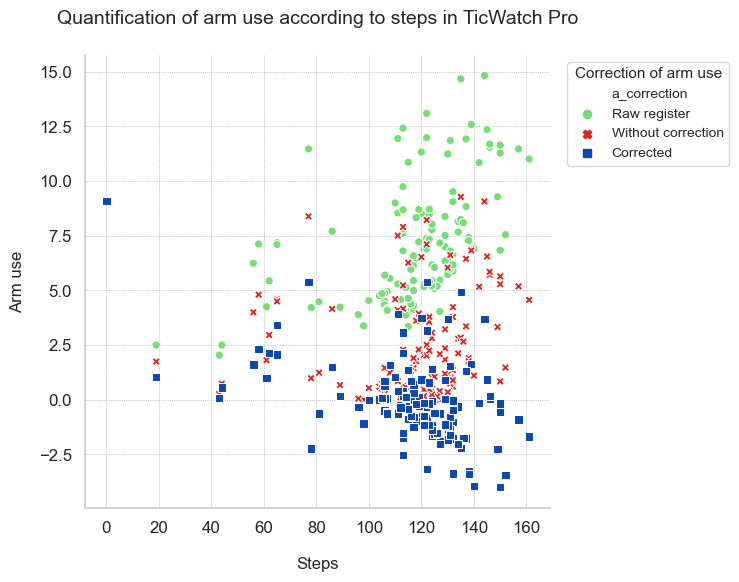

In [13]:
# Choosing only data when walking (dataframe de representación de gráficos)
DF_Android_arm_use_walking_3_stage_graf = DF_Android_arm_use_3_stage_graf[DF_Android_arm_use_3_stage_graf['Activity level'] == 'WALKING']


#GRÁFICO
colors = ['#77DD77','#DD2520', '#0D47B1'] 
plt.figure(figsize=(6, 6), dpi = 100)
scatter_a_raw = sb.scatterplot(x='s', y='arm_use', data = DF_Android_arm_use_walking_3_stage_graf ,hue='a_correction',hue_order = ["Raw register", "Without correction", "Corrected"], style = 'a_correction', style_order = ["Raw register", "Without correction", "Corrected"], palette = colors )

sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

scatter_a_raw.axes.set_title("Quantification of arm use according to steps in TicWatch Pro", fontsize=14, y = 1.05)
scatter_a_raw.set_xlabel("Steps",labelpad = 15, fontsize=12)
scatter_a_raw.set_ylabel("Arm use", labelpad = 10,fontsize=12)

#plt.setp(scatter_a_raw.get_legend().get_texts(), fontsize='11') # for legend text
plt.legend(title = "Correction of arm use", fontsize = "10", title_fontsize = "11", bbox_to_anchor=(1.4, 1.0), loc = 'upper right')

#DATAFRAME DEL GRÁFICO
DF_Android_arm_use_walking_3_stage_graf

### DESCRIPTIVES

In [14]:
DF_Android_completed_walking['s'].describe() # Descriptives of all data 

count    129.000000
mean     116.286822
std       25.704813
min        0.000000
25%      111.000000
50%      121.000000
75%      131.000000
max      161.000000
Name: s, dtype: float64

In [15]:
# Grouped by Activity level

grouped_data_activitylevel = DF_Android_completed.groupby('Activity level')
grouped_data_activitylevel['s'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity level,,,,,,,,
0,45.0,19.000000,37.755794,0.0,0.0,0.0,14.00,129.0
1,69.0,1.072464,7.302938,0.0,0.0,0.0,0.00,59.0
2,68.0,12.867647,24.667886,0.0,0.0,0.0,16.25,88.0
3,68.0,46.352941,40.173788,0.0,0.0,50.5,73.00,129.0
4,129.0,116.286822,25.704813,0.0,111.0,121.0,131.00,161.0


### Distributions

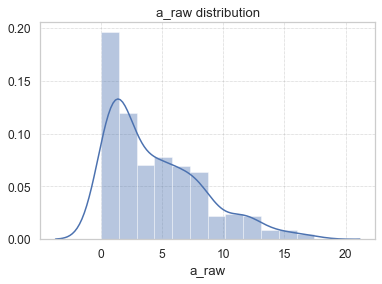

In [16]:
# Histograma (frecuencias de la distribución) (número de veces que se repiten cada uno de los resultados)

sb.distplot(DF_Android_completed['a_raw']).set(title='a_raw distribution')
sb.set_style("ticks")

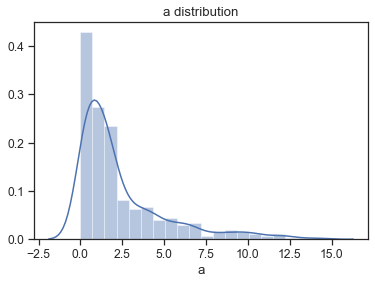

In [17]:
sb.distplot(DF_Android_completed['a']).set(title='a distribution')
sb.set_style("ticks")

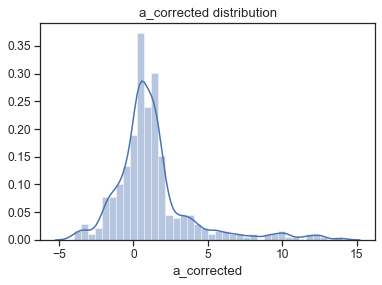

In [18]:
sb.distplot(DF_Android_completed['a_corrected']).set(title='a_corrected distribution')
sb.set_style("ticks")

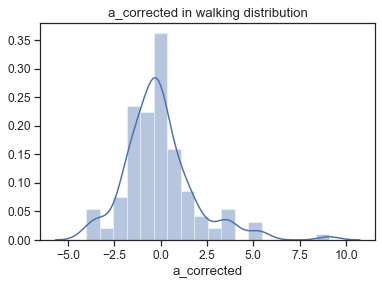

In [19]:
sb.distplot(DF_Android_completed_walking['a_corrected']).set(title='a_corrected in walking distribution')
sb.set_style("ticks")

### Normality with Kolmogorov-Smirnov Test

In [20]:
print ("Normality?", stats.kstest(DF_Android_completed['a_raw'], 'norm'))
print ("Normality?", stats.kstest(DF_Android_completed['a'], 'norm'))
print ("Normality?", stats.kstest(DF_Android_completed['a_corrected'], 'norm'))
print ("Normality?", stats.kstest(DF_Android_completed_walking['s'], 'norm'))
print ("Normality?", stats.kstest(DF_Android_completed_walking['a_raw'], 'norm'))
print ("Normality?", stats.kstest(DF_Android_completed_walking['a'], 'norm'))
print ("Normality?", stats.kstest(DF_Android_completed_walking['a_corrected'], 'norm'))

Normality? KstestResult(statistic=0.6686211005558946, pvalue=1.5068595979758177e-167)
Normality? KstestResult(statistic=0.51270235521174, pvalue=5.453289099185754e-93)
Normality? KstestResult(statistic=0.3016205610164893, pvalue=4.409355308749242e-31)
Normality? KstestResult(statistic=0.9922480620155039, pvalue=1.0838205145068857e-272)
Normality? KstestResult(statistic=0.986051331145884, pvalue=8.825850468182307e-240)
Normality? KstestResult(statistic=0.5, pvalue=2.397922120487056e-30)
Normality? KstestResult(statistic=0.15076946568373523, pvalue=0.0050293631693109075)


### Correlations

Text(0.5, 1.0, 'Correlations - all data')

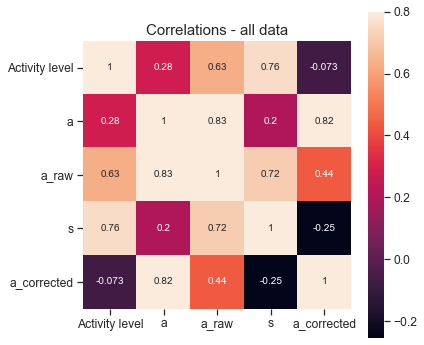

In [21]:
# Matriz de correlación (all data):

corrmat = DF_Android_completed.corr()
f, ax = plt.subplots(figsize=(6, 6))
sb.heatmap(corrmat, annot = True, vmax=.8, square=True);
plt.title('Correlations - all data', fontsize = 15)

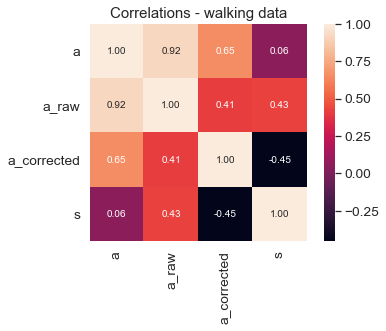

In [22]:
# Matriz de correlación
k = 4 # Número de variables.
corrmat = DF_Android_completed_walking.corr()
cols = corrmat.nlargest(k, 'a')['a'].index
cm = np.corrcoef(DF_Android_completed_walking[cols].values.T)
sb.set(font_scale = 1.25)
hm = sb.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values).set(title = 'Correlations - walking data')
plt.show()

Spearman's Correlation

In [23]:
print ("Correlation between 'a_raw' and 's': ", stats.spearmanr(DF_Android_completed_walking['a_raw'], DF_Android_completed_walking['s']))
print ("Correlation between 'a' and 's':", stats.spearmanr(DF_Android_completed_walking['a'], DF_Android_completed_walking['s']))
print ("Correlation between 'a_corrected' and 's':", stats.spearmanr(DF_Android_completed_walking['a_corrected'], DF_Android_completed_walking['s']))

Correlation between 'a_raw' and 's':  SpearmanrResult(correlation=0.5360402794473988, pvalue=5.889262685691479e-11)
Correlation between 'a' and 's': SpearmanrResult(correlation=0.27099039133351566, pvalue=0.001894838413930188)
Correlation between 'a_corrected' and 's': SpearmanrResult(correlation=-0.416379618327479, pvalue=9.206263560437263e-07)


### Contraste de hipótesis 

In [24]:
# Split data grouped by activity level to compare

#Datos de break
DF_break0 = DF_Android_completed[DF_Android_completed['Activity level'] == 0]

# Datos de actividad leve
DF_lowlevel1 = DF_Android_completed[DF_Android_completed['Activity level'] == 1]

# Datos de actividad media
DF_mediumlevel2 = DF_Android_completed[DF_Android_completed['Activity level'] == 2]

#Datos de actividad alta
DF_highlevel3 = DF_Android_completed[DF_Android_completed['Activity level'] == 3]

#Datos de caminata
DF_onlywalking4 = DF_Android_completed[DF_Android_completed['Activity level'] == 4]

Homogeneidad de varianzas?


In [25]:
# Levene test with the median
levene_test_break = stats.levene(DF_break0['a'],DF_break0['a_corrected'], center='median')
print ("Break:", levene_test_break)

#Actividad baja (DF_lowlevel1)
levene_test_low = stats.levene(DF_lowlevel1['a'],DF_lowlevel1['a_corrected'], center='median')
print ("Low:", levene_test_low)

#Actividad media (DF_mediumlevel2)
levene_test_med = stats.levene(DF_mediumlevel2['a'],DF_mediumlevel2['a_corrected'], center='median')
print ("Medium:", levene_test_med)

#Actividad alta (DF_highlevel3)
levene_test_high = stats.levene(DF_highlevel3['a'],DF_highlevel3['a_corrected'], center='median')
print ("High:", levene_test_high)

#Caminata (DF_onlywalking4)
levene_test_walking = stats.levene(DF_onlywalking4['a'],DF_onlywalking4['a_corrected'], center='median')
print ("Walking:", levene_test_walking)

Break: LeveneResult(statistic=0.001890175811139145, pvalue=0.9654204732114955)
Low: LeveneResult(statistic=0.3034260133770409, pvalue=0.5826462889701903)
Medium: LeveneResult(statistic=4.801333381511456, pvalue=0.030166141905055902)
High: LeveneResult(statistic=0.1048528149774546, pvalue=0.7465868478002013)
Walking: LeveneResult(statistic=8.42733255915365, pvalue=0.00401845308478235)


In [26]:
# Significant differences between activities?

print ("Low-med:", stats.mannwhitneyu(DF_lowlevel1['a'],DF_mediumlevel2['a']))
print ("Low-high:", stats.mannwhitneyu(DF_lowlevel1['a'],DF_highlevel3['a']))
print ("Low-walk:", stats.mannwhitneyu(DF_lowlevel1['a'],DF_onlywalking4['a']))

print ("Medium.high:", stats.mannwhitneyu(DF_mediumlevel2['a'],DF_highlevel3['a']))
print ("Medium-walk:", stats.mannwhitneyu(DF_mediumlevel2['a'],DF_onlywalking4['a']))

print ("High-walk:", stats.mannwhitneyu(DF_highlevel3['a'],DF_onlywalking4['a']))



print ("Low-med:", stats.mannwhitneyu(DF_lowlevel1['a_raw'],DF_mediumlevel2['a_raw']))
print ("Low-high:", stats.mannwhitneyu(DF_lowlevel1['a_raw'],DF_highlevel3['a_raw']))
print ("Low-walk:", stats.mannwhitneyu(DF_lowlevel1['a_raw'],DF_onlywalking4['a_raw']))

print ("Medium.high:", stats.mannwhitneyu(DF_mediumlevel2['a_raw'],DF_highlevel3['a_raw']))
print ("Medium-walk:", stats.mannwhitneyu(DF_mediumlevel2['a_raw'],DF_onlywalking4['a_raw']))

print ("High-walk:", stats.mannwhitneyu(DF_highlevel3['a_raw'],DF_onlywalking4['a_raw']))



print ("Low-med:", stats.mannwhitneyu(DF_lowlevel1['a_corrected'],DF_mediumlevel2['a_corrected']))
print ("Low-high:", stats.mannwhitneyu(DF_lowlevel1['a_corrected'],DF_highlevel3['a_corrected']))
print ("Low-walk:", stats.mannwhitneyu(DF_lowlevel1['a_corrected'],DF_onlywalking4['a_corrected']))

print ("Medium.high:", stats.mannwhitneyu(DF_mediumlevel2['a_corrected'],DF_highlevel3['a_corrected']))
print ("Medium-walk:", stats.mannwhitneyu(DF_mediumlevel2['a_corrected'],DF_onlywalking4['a_corrected']))

print ("High-walk:", stats.mannwhitneyu(DF_highlevel3['a_corrected'],DF_onlywalking4['a_corrected']))

Low-med: MannwhitneyuResult(statistic=1070.5, pvalue=2.020099705297215e-08)
Low-high: MannwhitneyuResult(statistic=117.0, pvalue=4.250370022520364e-22)
Low-walk: MannwhitneyuResult(statistic=2440.0, pvalue=8.365662158683158e-08)
Medium.high: MannwhitneyuResult(statistic=367.0, pvalue=1.2995801778324729e-17)
Medium-walk: MannwhitneyuResult(statistic=3659.0, pvalue=0.028052431354950166)
High-walk: MannwhitneyuResult(statistic=2118.0, pvalue=1.2550083089143953e-09)
Low-med: MannwhitneyuResult(statistic=427.0, pvalue=7.337393699255233e-17)
Low-high: MannwhitneyuResult(statistic=51.0, pvalue=2.5981085546566154e-23)
Low-walk: MannwhitneyuResult(statistic=3.0, pvalue=2.7664489981306e-31)
Medium.high: MannwhitneyuResult(statistic=311.0, pvalue=1.5624789907275452e-18)
Medium-walk: MannwhitneyuResult(statistic=69.0, pvalue=3.884368819822673e-30)
High-walk: MannwhitneyuResult(statistic=4004.0, pvalue=0.15798485022847153)
Low-med: MannwhitneyuResult(statistic=1337.0, pvalue=7.073032035696797e-06)


### Statistics

In [27]:
# Break (DF_break0)
print ("Break:", stats.wilcoxon(DF_break0['a'],DF_break0['a_corrected']))

# Actividad baja (DF_lowlevel1)
print ("Low:", stats.wilcoxon(DF_lowlevel1['a'],DF_lowlevel1['a_corrected']))

# Actividad media (DF_mediumlevel2)
print ("Medium:", stats.wilcoxon(DF_mediumlevel2['a'],DF_mediumlevel2['a_corrected']))

# Actividad alta (DF_highlevel3)
print ("High:", stats.wilcoxon(DF_highlevel3['a'],DF_highlevel3['a_corrected']))

# Caminata (DF_onlywalking4)
print ("Walking:", stats.wilcoxon(DF_onlywalking4['a'],DF_onlywalking4['a_corrected']))

Break: WilcoxonResult(statistic=4.0, pvalue=0.006039559048656822)
Low: WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976)
Medium: WilcoxonResult(statistic=0.0, pvalue=8.857457687863547e-05)
High: WilcoxonResult(statistic=60.0, pvalue=2.478593406448764e-08)
Walking: WilcoxonResult(statistic=31.0, pvalue=1.9707469076215903e-22)


## iOS

In [28]:
DF_iOS_all = DF_iOS_all[['Activity level','a','a_raw','s', 't']] # Ordena las columnas
DF_iOS_all
#DF_all.head()

,Activity level,a,a_raw,s,t
patient_id,,,,,
20001,1,0.037653,0.037653,0,2021-05-25 15:35:45
20001,1,0.031631,0.031631,0,2021-05-25 15:36:45
20001,1,0.067792,0.067792,0,2021-05-25 15:37:45
20001,1,0.036747,0.036747,0,2021-05-25 15:38:45
20001,1,0.055749,0.055749,0,2021-05-25 15:39:45
...,...,...,...,...,...
20507,4,0.455209,0.455209,0,2021-08-07 23:46:51
20507,4,0.403863,0.403863,0,2021-08-07 23:47:51
20507,4,0.381988,0.381988,0,2021-08-07 23:48:51


To apply the method of correction it is necessary divide the number of steps registered by all the logs previous to that register

In [29]:
# ARREGLO PARA QUE EL NÚMERO DE STEPS QUE SE REGISTRAN SE VEAN IGUAL QUE EN LOS REGISTROS DE ANDROID (SOLO SE APLICA A LA REGISTROS DE ACTIVIDAD 4 'WALKING')

# Primero se cambia el índice del dataframe (DF) con todos los registros para poder trabajar con bucles for
DF_iOS_adjust_steps = DF_iOS_all.rename_axis('patient_id').reset_index()

# Como se necesita idenficiar el paciente sobre el que se está realizando el arreglo, el tipo de actividad, se crean las siguientes variables:
patient_ref = DF_iOS_adjust_steps.loc[0,'patient_id'] # Tomamos el paciente de la fila 0 como el primer paciente a estudiar
activity = 0  # Inicializamos la actividad como la activdad 0
pointer_start_steps= 0 # Punto que indica la fila en la que empezaremos a rellenar de steps, si cursa


for row in range(len(DF_iOS_adjust_steps['s'])):
    # Identificamos las filas con actividad 4 (walking)
    if DF_iOS_adjust_steps.loc[row,'Activity level'] == 4:
        # Identificamos si, en esta nueva fila, la actividad ha cambiado de otra actividad a la actividad 4
        if activity != DF_iOS_adjust_steps.loc[row,'Activity level']:
            pointer_start_steps= row # Si en esta fila ha cambiado a actividad 4, guardamos esta fila como inicio para rellenar con steps
        # Se comprueba si el paciente es el mismo para todas estas filas con activiad 4
        if DF_iOS_adjust_steps.loc[row,'patient_id'] == patient_ref:
            #Se busca en la fila si el registro de steps es >0
            if DF_iOS_adjust_steps.loc[row,'s'] > 0:
                # Se divide el número de steps registrados en esta fila para todas las filas correspondientes hasta la fila indicada con el puntero de inicio puntero_inic_steps
                num_rows_with_steps = (row - pointer_start_steps) + 1 # Número de filas en las que se tiene que repartir el registro de steps
                for i in range(num_rows_with_steps):
                    DF_iOS_adjust_steps.loc[pointer_start_steps+ i,'s'] = round((DF_iOS_adjust_steps.loc[row,'s']/num_rows_with_steps))
                pointer_start_steps= row + 1
        # Si en esta fila con actividad 4 el paciente ha cambiado a un nuevo paciente
        else:
            pointer_start_steps= row # Reinicia a esta fila el puntero de inicio de reparto de steps
            patient_ref = DF_iOS_adjust_steps.loc[row,'patient_id'] # reinicia el paciente identificado
            #Se busca en la fila si el registro de steps es >0, por si en este cambio de paciente también se ha registrado steps 
            if DF_iOS_adjust_steps.loc[row,'s'] > 0:
                num_rows_with_steps = (row - pointer_start_steps) + 1
                pointer_start_steps= row + 1
                for i in range(num_rows_with_steps):
                    DF_iOS_adjust_steps.loc[pointer_start_steps+ i,'s'] = round((DF_iOS_adjust_steps.loc[row,'s']/num_rows_with_steps))
                pointer_start_steps= row + 1
    # En cada fila resetea la actividad para identificar cambios a la actividad 4
    activity = DF_iOS_adjust_steps.loc[row,'Activity level']

###############################################################################################
# ESTE ES EL RESULTADO

DF_iOS_adjust_steps = DF_iOS_adjust_steps.set_index('patient_id') # Se vuelve a poner el patient como índice
DF_iOS_adjust_steps

,Activity level,a,a_raw,s,t
patient_id,,,,,
20001,1,0.037653,0.037653,0,2021-05-25 15:35:45
20001,1,0.031631,0.031631,0,2021-05-25 15:36:45
20001,1,0.067792,0.067792,0,2021-05-25 15:37:45
20001,1,0.036747,0.036747,0,2021-05-25 15:38:45
20001,1,0.055749,0.055749,0,2021-05-25 15:39:45
...,...,...,...,...,...
20507,4,0.455209,0.455209,95,2021-08-07 23:46:51
20507,4,0.403863,0.403863,95,2021-08-07 23:47:51
20507,4,0.381988,0.381988,95,2021-08-07 23:48:51


In [30]:
# Filtering walking data
DF_iOS_walking = DF_iOS_adjust_steps[DF_iOS_adjust_steps['Activity level'] == 4]

# Obtaining the new variable 'w_swing'
DF_iOS_walking_w_swing = DF_iOS_walking.assign(w_swing = DF_iOS_walking['a_raw'].div(DF_iOS_walking['s']))
DF_iOS_walking_w_swing.replace([np.inf, -np.inf], 0, inplace = True)

# Obtaining the means for each subject
DF_iOS_w_swing_means = DF_iOS_walking_w_swing.groupby(['patient_id'])['w_swing'].mean()

# Calculating 'a_corrected'
DF_iOS_completed = DF_iOS_adjust_steps.assign(a_corrected = DF_iOS_adjust_steps['a_raw'] - DF_iOS_adjust_steps['s'] * DF_iOS_w_swing_means)
DF_iOS_completed

,Activity level,a,a_raw,s,t,a_corrected
patient_id,,,,,,
20001,1,0.037653,0.037653,0,2021-05-25 15:35:45,0.037653
20001,1,0.031631,0.031631,0,2021-05-25 15:36:45,0.031631
20001,1,0.067792,0.067792,0,2021-05-25 15:37:45,0.067792
20001,1,0.036747,0.036747,0,2021-05-25 15:38:45,0.036747
20001,1,0.055749,0.055749,0,2021-05-25 15:39:45,0.055749
...,...,...,...,...,...,...
20507,4,0.455209,0.455209,95,2021-08-07 23:46:51,0.066715
20507,4,0.403863,0.403863,95,2021-08-07 23:47:51,0.015370
20507,4,0.381988,0.381988,95,2021-08-07 23:48:51,-0.006505


In [31]:
# Choosing only data when walking for analysis
DF_iOS_completed_walking = DF_iOS_completed[DF_iOS_completed['Activity level'] == 4]
DF_iOS_completed_walking

,Activity level,a,a_raw,s,t,a_corrected
patient_id,,,,,,
20001,4,0.314770,0.314770,122,2021-05-25 15:59:45,0.145045
20001,4,0.396013,0.396013,122,2021-05-25 16:00:45,0.226288
20001,4,0.393944,0.393944,122,2021-05-25 16:01:45,0.224219
20001,4,0.362903,0.362903,122,2021-05-25 16:02:45,0.193177
20001,4,0.000000,0.399349,122,2021-05-25 16:03:45,0.229624
...,...,...,...,...,...,...
20507,4,0.455209,0.455209,95,2021-08-07 23:46:51,0.066715
20507,4,0.403863,0.403863,95,2021-08-07 23:47:51,0.015370
20507,4,0.381988,0.381988,95,2021-08-07 23:48:51,-0.006505


### Some plots

Comparison between levels of quantification of arm use

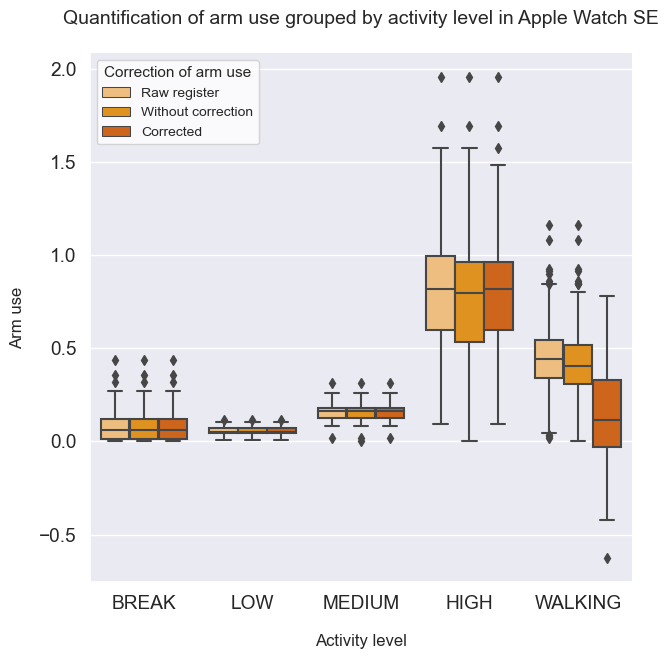

In [32]:
# CREA UN NUEVO DF CON UN NUEVO ORDENAN DE LOS DATOS PARA PODER REPRESENTARLOS DE FORMA ADECUADA EN UN BOXPLOT
DF_iOS_completed_1 = DF_iOS_completed[['Activity level', 'a_raw', 's']]
DF_iOS_completed_1['a_correction'] = ['Raw register' for x in range(len(DF_iOS_completed['a_raw']))]
DF_iOS_completed_1.rename(columns={'a_raw': 'arm_use'}, inplace=True)

DF_iOS_completed_2 = DF_iOS_completed[['Activity level', 'a', 's']]
DF_iOS_completed_2.rename(columns={'a': 'arm_use'}, inplace=True)
DF_iOS_completed_2['a_correction'] = ['Without correction' for x in range(len(DF_iOS_completed['a']))]

DF_iOS_completed_3 = DF_iOS_completed[['Activity level', 'a_corrected', 's']]
DF_iOS_completed_3.rename(columns={'a_corrected': 'arm_use'}, inplace=True)
DF_iOS_completed_3['a_correction'] = ['Corrected' for x in range(len(DF_iOS_completed['a_corrected']))]

DF_iOS_arm_use_3_stage_graf = pd.concat([DF_iOS_completed_1,DF_iOS_completed_2,DF_iOS_completed_3])

DF_iOS_arm_use_3_stage_graf.loc[DF_iOS_arm_use_3_stage_graf['Activity level'] == 0, 'Activity level'] = "BREAK"
DF_iOS_arm_use_3_stage_graf.loc[DF_iOS_arm_use_3_stage_graf['Activity level'] == 1, 'Activity level'] = "LOW"
DF_iOS_arm_use_3_stage_graf.loc[DF_iOS_arm_use_3_stage_graf['Activity level'] == 2, 'Activity level'] = "MEDIUM"
DF_iOS_arm_use_3_stage_graf.loc[DF_iOS_arm_use_3_stage_graf['Activity level'] == 3, 'Activity level'] = "HIGH"
DF_iOS_arm_use_3_stage_graf.loc[DF_iOS_arm_use_3_stage_graf['Activity level'] == 4, 'Activity level'] = "WALKING"

# GRÁFICO
plt.figure(figsize=(7, 7), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#FFC06D','#FF9800','#EA6000'] #COLORES naranja

boxplot_arm_use = sb.boxplot(x='Activity level', y = 'arm_use', data = DF_iOS_arm_use_3_stage_graf, hue = 'a_correction', hue_order = ['Raw register', 'Without correction', 'Corrected'], order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors)
sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks
boxplot_arm_use.axes.set_title("Quantification of arm use grouped by activity level in Apple Watch SE", fontsize=14, y = 1.04)
boxplot_arm_use.set_xlabel("Activity level", labelpad = 15, fontsize=12)
boxplot_arm_use.set_ylabel("Arm use", labelpad = 10, fontsize=12)

plt.legend(title = "Correction of arm use", fontsize = "10", title_fontsize = "11", loc = 'upper left')

#quantiles_iOS_3_stage = pd.DataFrame(DF_iOS_arm_use_3_stage_graf.groupby(['Activity level','a_correction'])['arm_use'].quantile([0, 0.25,0.5,0.75,1]))
#quantiles_iOS_3_stage

#DATAFRAME DEL GRÁFICO
#DF_iOS_arm_use_3_stage_graf

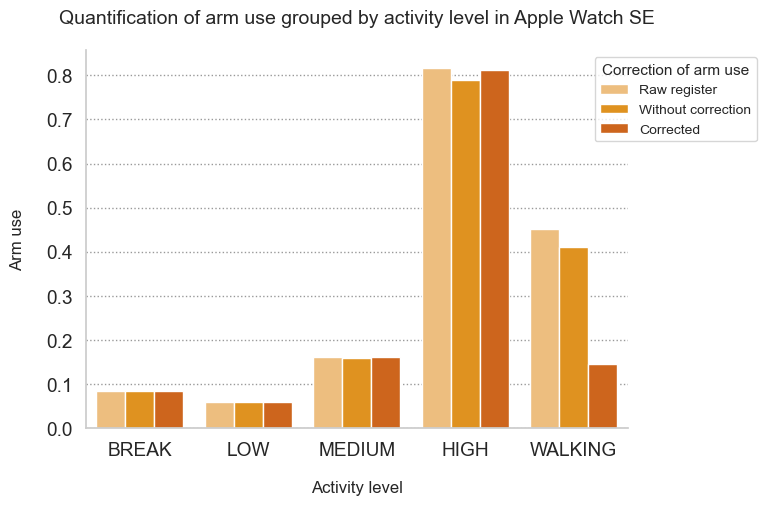

In [33]:
DF_iOS_arm_use_3_stage_graf_mean = DF_iOS_arm_use_3_stage_graf.groupby(['a_correction','Activity level'])['arm_use'].mean().reset_index()

plt.figure(figsize=(7, 5), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#FFC06D','#FF9800','#EA6000'] #COLORES naranja

barplot_arm_use = sb.barplot(x = 'Activity level', y = 'arm_use', data = DF_iOS_arm_use_3_stage_graf_mean, hue = 'a_correction', hue_order = ["Raw register","Without correction", "Corrected"], order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors)

sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks)

barplot_arm_use.axes.set_title("Quantification of arm use grouped by activity level in Apple Watch SE", fontsize=14, y =1.05)
barplot_arm_use.set_xlabel("Activity level", labelpad = 15, fontsize=12)
barplot_arm_use.set_ylabel("Arm use", labelpad = 15, fontsize=12)


plt.legend(title = "Correction of arm use", fontsize = "10", title_fontsize = "11", bbox_to_anchor=(1.25, 1.0), loc = 'upper right')

#DATAFRAME DEL GRÁFICO
#DF_iOS_arm_use_3_stage_graf_mean

SOLO DURANTE WALKING QUE ES LO MÁS SIGNIFICATIVO:

,Activity level,s,arm_use,a_correction
patient_id,,,,
20001,WALKING,122,0.314770,Raw register
20001,WALKING,122,0.396013,Raw register
20001,WALKING,122,0.393944,Raw register
20001,WALKING,122,0.362903,Raw register
20001,WALKING,122,0.399349,Raw register
...,...,...,...,...
20507,WALKING,95,0.066715,Corrected
20507,WALKING,95,0.015370,Corrected
20507,WALKING,95,-0.006505,Corrected


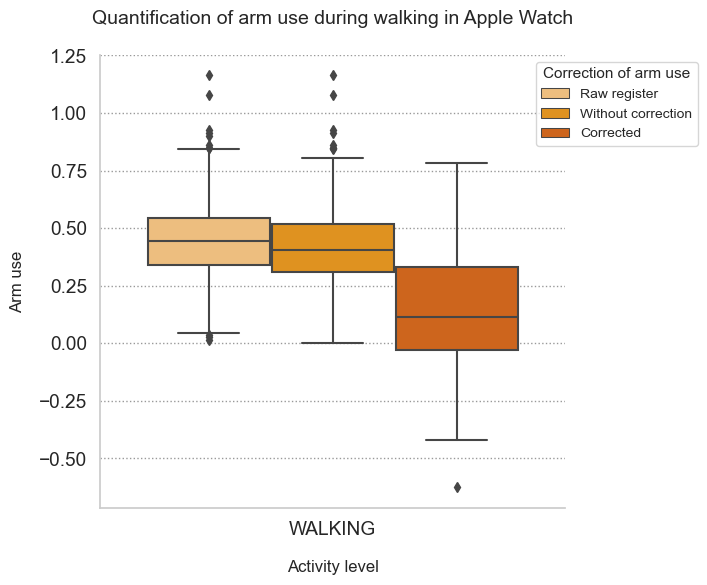

In [34]:
# CREA UN NUEVO DF CON UN NUEVO ORDENAN DE LOS DATOS PARA PODER REPRESENTARLOS DE FORMA ADECUADA EN UN BOXPLOT
# Raw data
DF_iOS_completed_1 = DF_iOS_completed_walking[['Activity level', 's', 'a_raw']]
DF_iOS_completed_1.rename(columns={'a_raw': 'arm_use'}, inplace=True)
DF_iOS_completed_1['a_correction'] = ['Raw register' for x in range(len(DF_iOS_completed_walking['a_raw']))]
# System adjustment
DF_iOS_completed_2 = DF_iOS_completed_walking[['Activity level', 's', 'a']]
DF_iOS_completed_2.rename(columns={'a': 'arm_use'}, inplace=True)
DF_iOS_completed_2['a_correction'] = ['Without correction' for x in range(len(DF_iOS_completed_walking['a']))]
# New correction
DF_iOS_completed_3 = DF_iOS_completed_walking[['Activity level', 's', 'a_corrected']]
DF_iOS_completed_3.rename(columns={'a_corrected': 'arm_use'}, inplace=True)
DF_iOS_completed_3['a_correction'] = ['Corrected' for x in range(len(DF_iOS_completed_walking['a_corrected']))]
# Se junta cada parte en un mismo dataframe
DF_iOS__walking_arm_use_3_stage_graf = pd.concat([DF_iOS_completed_1, DF_iOS_completed_2,DF_iOS_completed_3])


DF_iOS__walking_arm_use_3_stage_graf.loc[DF_iOS__walking_arm_use_3_stage_graf['Activity level'] == 4, 'Activity level'] = "WALKING"

#GRAFICO
plt.figure(figsize=(6, 6), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#FFC06D','#FF9800','#EA6000'] #COLORES NARANJA claro y oscuro

boxplot_arm_use = sb.boxplot(x='Activity level', y = 'arm_use',data = DF_iOS__walking_arm_use_3_stage_graf, hue = 'a_correction',hue_order = ["Raw register", "Without correction", "Corrected"], palette = colors)
sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

boxplot_arm_use.axes.set_title("Quantification of arm use during walking in Apple Watch", fontsize=14, y = 1.05)
boxplot_arm_use.set_xlabel("Activity level",labelpad = 15, fontsize=12)
boxplot_arm_use.set_ylabel("Arm use", labelpad = 10, fontsize=12)

#plt.setp(boxplot_arm_use.get_legend().get_texts(), fontsize='12') # for legend text
plt.legend(title = "Correction of arm use", fontsize = "10", title_fontsize = "11",bbox_to_anchor=(1.3, 1.0), loc = 'upper right')

#DATAFRAME DEL GRÁFICO
DF_iOS__walking_arm_use_3_stage_graf

#quantiles_walking_arm_use_3_stage = pd.DataFrame(DF_iOS__walking_arm_use_3_stage_graf.groupby(['Activity level','a_correction'])['arm_use'].quantile([0, 0.25,0.5,0.75,1]))
#quantiles_walking_arm_use_3_stage

Dispersion plot

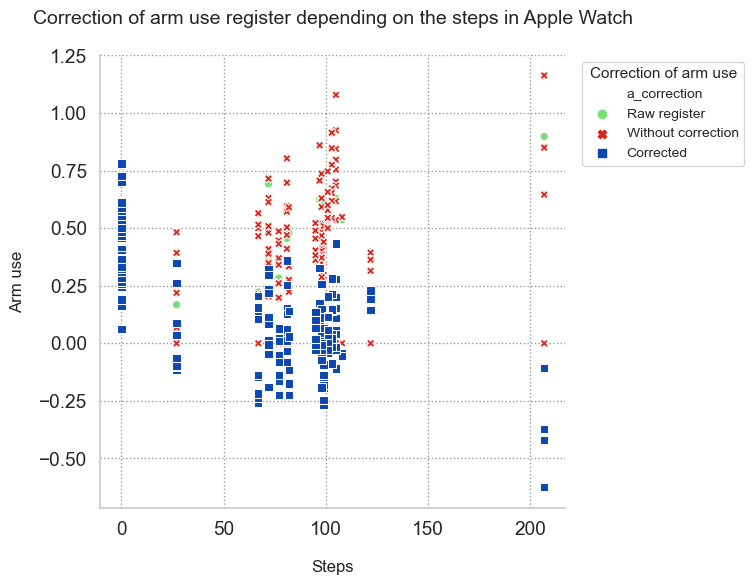

In [35]:
# Choosing only data when walking (dataframe de representación de gráficos)
DF_iOS_walking_arm_use_3_stage_graf = DF_iOS_arm_use_3_stage_graf[DF_iOS_arm_use_3_stage_graf['Activity level'] == 'WALKING']

#GRÁFICO
colors = ['#77DD77','#DD2520', '#0D47B1'] 
plt.figure(figsize=(6, 6), dpi = 100)
scatter_a_raw = sb.scatterplot(x='s', y='arm_use', data = DF_iOS_walking_arm_use_3_stage_graf ,hue='a_correction',hue_order = ["Raw register", "Without correction", "Corrected"], style = 'a_correction', style_order = ["Raw register", "Without correction", "Corrected"], palette = colors )

sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

scatter_a_raw.axes.set_title("Correction of arm use register depending on the steps in Apple Watch", fontsize=14, y = 1.05)
scatter_a_raw.set_xlabel("Steps",labelpad = 15, fontsize=12)
scatter_a_raw.set_ylabel("Arm use", labelpad = 10,fontsize=12)

#plt.setp(scatter_a_raw.get_legend().get_texts(), fontsize='11') # for legend text
plt.legend(title = "Correction of arm use", fontsize = "10", title_fontsize = "11", bbox_to_anchor=(1.4, 1.0), loc = 'upper right')

#DATAFRAME DEL GRÁFICO
#DF_iOS_walking_arm_use_3_stage_graf

### Descriptives 

In [36]:
# Datos agrupados por Activity level

grouped_data_activitylevel = DF_iOS_completed.groupby('Activity level')
grouped_data_activitylevel['s'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity level,,,,,,,,
0,69.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,63.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,63.0,0.190476,1.511858,0.0,0.0,0.0,0.0,12.0
3,65.0,4.723077,26.805729,0.0,0.0,0.0,0.0,166.0
4,214.0,59.607477,49.087114,0.0,0.0,77.0,98.0,207.0


### Distributions 

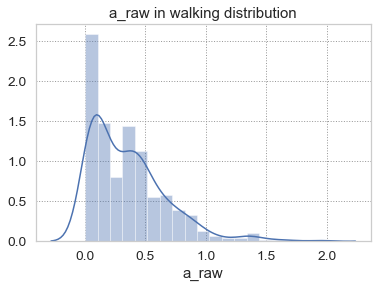

In [37]:
sb.distplot(DF_iOS_completed['a_raw']).set(title='a_raw in walking distribution')
sb.set_style("ticks")

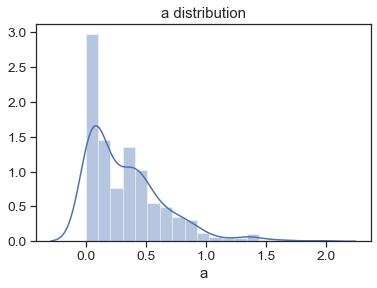

In [38]:
sb.distplot(DF_iOS_completed['a']).set(title='a distribution')
sb.set_style("ticks")

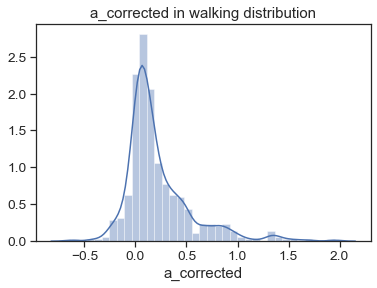

In [39]:
sb.distplot(DF_iOS_completed['a_corrected']).set(title='a_corrected in walking distribution')
sb.set_style("ticks")

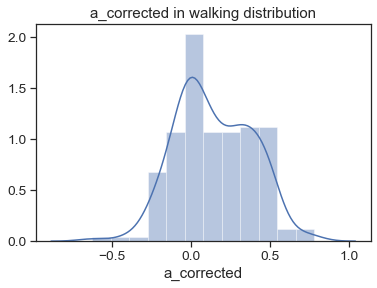

In [40]:
sb.distplot(DF_iOS_completed_walking['a_corrected']).set(title='a_corrected in walking distribution')
sb.set_style("ticks")

### Normality with Kolmogorov-Test

In [41]:
print ("Normality?", stats.kstest(DF_iOS_completed['a_raw'], 'norm'))
print ("Normality?", stats.kstest(DF_iOS_completed['a'], 'norm'))
print ("Normality?", stats.kstest(DF_iOS_completed['a_corrected'], 'norm'))
print ("Normality?", stats.kstest(DF_iOS_completed_walking['s'], 'norm'))
print ("Normality?", stats.kstest(DF_iOS_completed_walking['a_raw'], 'norm'))
print ("Normality?", stats.kstest(DF_iOS_completed_walking['a'], 'norm'))
print ("Normality?", stats.kstest(DF_iOS_completed_walking['a_corrected'], 'norm'))

Normality? KstestResult(statistic=0.5011010295364823, pvalue=1.2792650937293501e-110)
Normality? KstestResult(statistic=0.5, pvalue=4.214197484785062e-110)
Normality? KstestResult(statistic=0.402977938532501, pvalue=5.077041863586747e-70)
Normality? KstestResult(statistic=0.6588785046728972, pvalue=1.1370812910411853e-91)
Normality? KstestResult(statistic=0.5145256476523545, pvalue=3.8956080376325876e-53)
Normality? KstestResult(statistic=0.5, pvalue=5.370323748446885e-50)
Normality? KstestResult(statistic=0.38003042212473687, pvalue=2.727817474827954e-28)


### Correlations 

Text(0.5, 1.0, 'Correlations - all data')

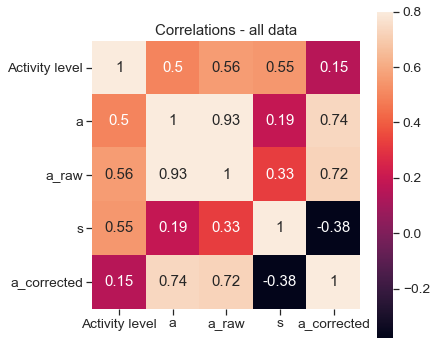

In [42]:
# Matriz de correlación (all data):

corrmat = DF_iOS_completed.corr()
f, ax = plt.subplots(figsize=(6, 6))
sb.heatmap(corrmat, annot = True, vmax=.8, square=True);
plt.title('Correlations - all data', fontsize = 15)

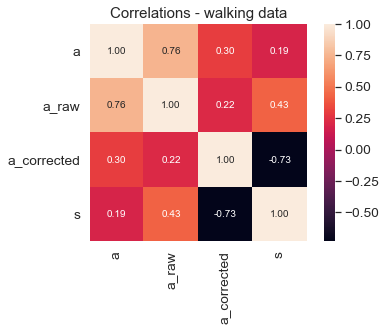

In [43]:
# Matriz de correlación
k = 4 # Número de variables.
corrmat = DF_iOS_completed_walking.corr()
cols = corrmat.nlargest(k, 'a')['a'].index
cm = np.corrcoef(DF_iOS_completed_walking[cols].values.T)
sb.set(font_scale = 1.25)
hm = sb.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values).set(title = 'Correlations - walking data')
plt.show()

Spearman's Correlation Test

In [44]:
print ("Correlation between 'a_raw' and 's': ", stats.spearmanr(DF_iOS_completed_walking['a_raw'], DF_iOS_completed_walking['s']))
print ("Correlation between 'a' and 's':", stats.spearmanr(DF_iOS_completed_walking['a'], DF_iOS_completed_walking['s']))
print ("Correlation between 'a_corrected' and 's':", stats.spearmanr(DF_iOS_completed_walking['a_corrected'], DF_iOS_completed_walking['s']))

Correlation between 'a_raw' and 's':  SpearmanrResult(correlation=0.40940659976187876, pvalue=4.687996980874583e-10)
Correlation between 'a' and 's': SpearmanrResult(correlation=0.22466633314492748, pvalue=0.0009337949068740848)
Correlation between 'a_corrected' and 's': SpearmanrResult(correlation=-0.6308737160775532, pvalue=3.735958858135058e-25)


### Contraste de hipótesis 

In [45]:
# Voy a separar los datos según activity level para trabajar de una manera más sencilla

#Datos de break
DF_iOS_break0 = DF_iOS_completed[DF_iOS_completed['Activity level'] == 0]

# Datos de actividad leve
DF_iOS_lowlevel1 = DF_iOS_completed[DF_iOS_completed['Activity level'] == 1]

# Datos de actividad media
DF_iOS_mediumlevel2 = DF_iOS_completed[DF_iOS_completed['Activity level'] == 2]

#Datos de actividad alta
DF_iOS_highlevel3 = DF_iOS_completed[DF_iOS_completed['Activity level'] == 3]

#Datos de caminata
DF_iOS_onlywalking4 = DF_iOS_completed[DF_iOS_completed['Activity level'] == 4]

In [46]:
# Levene test with the median
levene_test_iOS_break = stats.levene(DF_iOS_break0['a'],DF_iOS_break0['a_corrected'], center='median')
print ("Break:", levene_test_iOS_break)

#Actividad baja (DF_lowlevel1)
levene_test_iOS_low = stats.levene(DF_iOS_lowlevel1['a'],DF_iOS_lowlevel1['a_corrected'], center='median')
print ("Low:", levene_test_iOS_low)

#Actividad media (DF_mediumlevel2)
levene_test_iOS_med = stats.levene(DF_iOS_mediumlevel2['a'],DF_iOS_mediumlevel2['a_corrected'], center='median')
print ("Medium:", levene_test_iOS_med)

#Actividad alta (DF_highlevel3)
levene_test_iOS_high = stats.levene(DF_iOS_highlevel3['a'],DF_iOS_highlevel3['a_corrected'], center='median')
print ("High:", levene_test_iOS_high)

#Caminata (DF_onlywalking4)
levene_test_iOS_walking = stats.levene(DF_iOS_onlywalking4['a'],DF_iOS_onlywalking4['a_corrected'], center='median')
print ("Walking:", levene_test_iOS_walking)

Break: LeveneResult(statistic=0.0, pvalue=1.0)
Low: LeveneResult(statistic=0.0, pvalue=1.0)
Medium: LeveneResult(statistic=0.19163442336573144, pvalue=0.6623213344891088)
High: LeveneResult(statistic=0.23388783309954275, pvalue=0.6294822294793263)
Walking: LeveneResult(statistic=5.875233096315594, pvalue=0.015770800456367837)


In [47]:
# Significant differences between activities?

print ("Low-med:", stats.mannwhitneyu(DF_iOS_lowlevel1['a'],DF_iOS_mediumlevel2['a']))
print ("Low-high:", stats.mannwhitneyu(DF_iOS_lowlevel1['a'],DF_iOS_highlevel3['a']))
print ("Low-walk:", stats.mannwhitneyu(DF_iOS_lowlevel1['a'],DF_iOS_onlywalking4['a']))

print ("Medium.high:", stats.mannwhitneyu(DF_iOS_mediumlevel2['a'],DF_iOS_highlevel3['a']))
print ("Medium-walk:", stats.mannwhitneyu(DF_iOS_mediumlevel2['a'],DF_iOS_onlywalking4['a']))

print ("High-walk:", stats.mannwhitneyu(DF_iOS_highlevel3['a'],DF_iOS_onlywalking4['a']))



print ("Low-med:", stats.mannwhitneyu(DF_iOS_lowlevel1['a_raw'],DF_iOS_mediumlevel2['a_raw']))
print ("Low-high:", stats.mannwhitneyu(DF_iOS_lowlevel1['a_raw'],DF_iOS_highlevel3['a_raw']))
print ("Low-walk:", stats.mannwhitneyu(DF_iOS_lowlevel1['a_raw'],DF_iOS_onlywalking4['a_raw']))

print ("Medium.high:", stats.mannwhitneyu(DF_iOS_mediumlevel2['a_raw'],DF_iOS_highlevel3['a_raw']))
print ("Medium-walk:", stats.mannwhitneyu(DF_iOS_mediumlevel2['a_raw'],DF_iOS_onlywalking4['a_raw']))

print ("High-walk:", stats.mannwhitneyu(DF_iOS_highlevel3['a_raw'],DF_iOS_onlywalking4['a_raw']))



print ("Low-med:", stats.mannwhitneyu(DF_iOS_lowlevel1['a_corrected'],DF_iOS_mediumlevel2['a_corrected']))
print ("Low-high:", stats.mannwhitneyu(DF_iOS_lowlevel1['a_corrected'],DF_iOS_highlevel3['a_corrected']))
print ("Low-walk:", stats.mannwhitneyu(DF_iOS_lowlevel1['a_corrected'],DF_iOS_onlywalking4['a_corrected']))

print ("Medium.high:", stats.mannwhitneyu(DF_iOS_mediumlevel2['a_corrected'],DF_iOS_highlevel3['a_corrected']))
print ("Medium-walk:", stats.mannwhitneyu(DF_iOS_mediumlevel2['a_corrected'],DF_iOS_onlywalking4['a_corrected']))

print ("High-walk:", stats.mannwhitneyu(DF_iOS_highlevel3['a_corrected'],DF_iOS_onlywalking4['a_corrected']))


Low-med: MannwhitneyuResult(statistic=158.0, pvalue=2.565222991201284e-19)
Low-high: MannwhitneyuResult(statistic=133.0, pvalue=3.672330105434529e-20)
Low-walk: MannwhitneyuResult(statistic=1437.0, pvalue=1.143884679816921e-21)
Medium.high: MannwhitneyuResult(statistic=274.0, pvalue=1.4508626751800833e-17)
Medium-walk: MannwhitneyuResult(statistic=1895.0, pvalue=2.1303313690196124e-18)
High-walk: MannwhitneyuResult(statistic=2870.0, pvalue=3.7284258677853224e-13)
Low-med: MannwhitneyuResult(statistic=95.0, pvalue=1.530491567717015e-20)
Low-high: MannwhitneyuResult(statistic=7.0, pvalue=1.2032782723795246e-22)
Low-walk: MannwhitneyuResult(statistic=303.0, pvalue=5.302156667682954e-31)
Medium.high: MannwhitneyuResult(statistic=151.0, pvalue=8.077813539456897e-20)
Medium-walk: MannwhitneyuResult(statistic=817.0, pvalue=1.5041245070649967e-26)
High-walk: MannwhitneyuResult(statistic=2753.0, pvalue=8.227328723136892e-14)
Low-med: MannwhitneyuResult(statistic=95.0, pvalue=1.530491567717015e-

### Statistics

In [48]:
# Break (DF_break0)
#print ("Break:", stats.wilcoxon(DF_iOS_break0['a'],DF_iOS_break0['a_corrected']))

# Actividad baja (DF_lowlevel1)
#print ("Low:", stats.wilcoxon(DF_iOS_lowlevel1['a'],DF_iOS_lowlevel1['a_corrected']))

# Actividad media (DF_mediumlevel2)
print ("Medium:", stats.wilcoxon(DF_iOS_mediumlevel2['a'],DF_iOS_mediumlevel2['a_corrected']))

# Actividad alta (DF_highlevel3)
print ("High:", stats.wilcoxon(DF_iOS_highlevel3['a'],DF_iOS_highlevel3['a_corrected']))

# Caminata (DF_onlywalking4)
print ("Walking:", stats.wilcoxon(DF_iOS_onlywalking4['a'],DF_iOS_onlywalking4['a_corrected']))

Medium: WilcoxonResult(statistic=0.0, pvalue=0.31731050786291415)
High: WilcoxonResult(statistic=0.0, pvalue=0.17971249487899976)
Walking: WilcoxonResult(statistic=122.0, pvalue=8.785224244561026e-24)


# Android vs. iOS

IT IS NECESSARY TO NORMALIZE DATA

In [49]:
# NORMALIZE ANDROID
DF_Android_completed_normalize = DF_Android_completed.copy()
min_max_scaler = preprocessing.MinMaxScaler()
DF_Android_completed_normalize['normalized_a_raw'] = min_max_scaler.fit_transform(DF_Android_completed_normalize[['a_raw']])
DF_Android_completed_normalize['normalized_a'] = min_max_scaler.fit_transform(DF_Android_completed_normalize[['a']])
DF_Android_completed_normalize['normalized_a_corrected'] = min_max_scaler.fit_transform(DF_Android_completed_normalize[['a_corrected']])

# NORMALIZE iOS
DF_iOS_completed_normalize = DF_iOS_completed.copy()
min_max_scaler = preprocessing.MinMaxScaler()
DF_iOS_completed_normalize['normalized_a_raw'] = min_max_scaler.fit_transform(DF_iOS_completed_normalize[['a_raw']])
DF_iOS_completed_normalize['normalized_a'] = min_max_scaler.fit_transform(DF_iOS_completed_normalize[['a']])
DF_iOS_completed_normalize['normalized_a_corrected'] = min_max_scaler.fit_transform(DF_iOS_completed_normalize[['a_corrected']])

In [50]:
# CREA UN NUEVO DF CON UN NUEVO ORDENAN DE LOS DATOS PARA PODER REPRESENTARLOS DE FORMA ADECUADA EN UN BOXPLOT
DF_Android_completed_normalize['Smartwatch'] =  ['TicWatch Pro' for x in range(len(DF_Android_completed_normalize['normalized_a']))]
DF_iOS_completed_normalize['Smartwatch'] = ['Apple Watch' for x in range(len(DF_iOS_completed_normalize['normalized_a']))]
DF_Android_vs_iOS_graf = pd.concat([DF_Android_completed_normalize, DF_iOS_completed_normalize])

DF_Android_vs_iOS_graf.loc[DF_Android_vs_iOS_graf['Activity level'] == 0, 'Activity level'] = "BREAK"
DF_Android_vs_iOS_graf.loc[DF_Android_vs_iOS_graf['Activity level'] == 1, 'Activity level'] = "LOW"
DF_Android_vs_iOS_graf.loc[DF_Android_vs_iOS_graf['Activity level'] == 2, 'Activity level'] = "MEDIUM"
DF_Android_vs_iOS_graf.loc[DF_Android_vs_iOS_graf['Activity level'] == 3, 'Activity level'] = "HIGH"
DF_Android_vs_iOS_graf.loc[DF_Android_vs_iOS_graf['Activity level'] == 4, 'Activity level'] = "WALKING"

DF_Android_vs_iOS_graf.head()

,Activity level,a,a_raw,s,t,a_corrected,normalized_a_raw,normalized_a,normalized_a_corrected,Smartwatch
patient_id,,,,,,,,,,
79001,LOW,0.385824,0.385824,0,2021-05-19 18:51:48,0.385824,0.022117,0.026785,0.244061,TicWatch Pro
79001,LOW,0.439247,0.439247,0,2021-05-19 18:52:47,0.439247,0.025180,0.030494,0.247031,TicWatch Pro
79001,LOW,0.310032,0.310032,0,2021-05-19 18:53:47,0.310032,0.017772,0.021523,0.239847,TicWatch Pro
79001,LOW,0.358969,0.358969,0,2021-05-19 18:54:47,0.358969,0.020578,0.024921,0.242568,TicWatch Pro
79001,LOW,0.284155,0.284155,0,2021-05-19 18:55:48,0.284155,0.016289,0.019727,0.238409,TicWatch Pro


In [51]:
grouped_data_activitylevel_both = DF_Android_completed_normalize.groupby('Activity level')
grouped_data_activitylevel_both['normalized_a_raw'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity level,,,,,,,,
0,45.0,0.139693,0.165336,0.000000,0.034790,0.081088,0.167145,0.677457
1,69.0,0.043920,0.030356,0.000989,0.024949,0.031481,0.062431,0.184621
2,68.0,0.108817,0.042453,0.003235,0.080695,0.105244,0.125114,0.251288
3,68.0,0.408359,0.246022,0.046235,0.214240,0.350251,0.515506,1.000000
4,129.0,0.409231,0.157318,0.116857,0.291459,0.390112,0.489811,0.850141


In [52]:
q75, q25 = np.percentile(DF_Android_completed_normalize['normalized_a'], [75 ,25])
iqr = q75 - q25
iqr

0.1822546053699864

In [53]:
grouped_data_activitylevel_both_iOS = DF_iOS_completed_normalize.groupby('Activity level')
grouped_data_activitylevel_both_iOS['normalized_a_raw'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity level,,,,,,,,
0,69.0,0.041661,0.048164,0.000000,0.005269,0.028925,0.059128,0.223114
1,63.0,0.028391,0.012331,0.003674,0.020837,0.025208,0.035588,0.058214
2,63.0,0.080851,0.024631,0.006970,0.062691,0.081728,0.091451,0.160247
3,65.0,0.416859,0.199593,0.046484,0.304189,0.416551,0.508969,1.000000
4,214.0,0.230145,0.097991,0.006619,0.173374,0.226234,0.276798,0.594768


### Comparing a_raw between smartwatches

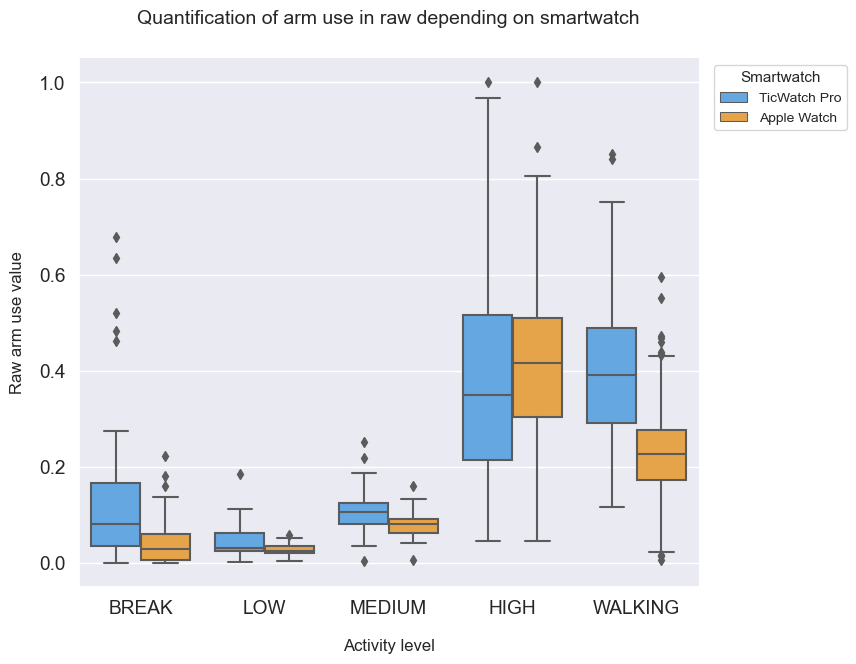

In [54]:
#GRAFICO
plt.figure(figsize=(8, 7), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#50A8F6','#FFA830'] #COLORES Azul u naranja

boxplot_arm_use = sb.boxplot(x='Activity level', y = 'normalized_a_raw', data = DF_Android_vs_iOS_graf, hue = 'Smartwatch', order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors)
sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

boxplot_arm_use.axes.set_title("Quantification of arm use in raw depending on smartwatch", fontsize=14, y = 1.05)
boxplot_arm_use.set_xlabel("Activity level", labelpad = 15, fontsize=12)
boxplot_arm_use.set_ylabel("Raw arm use value", labelpad = 10, fontsize=12)

plt.legend(title = "Smartwatch", fontsize = "10", title_fontsize = "11",bbox_to_anchor=(1.25, 1.0), loc = 'upper right')

#quantiles_Android_vs_iOS_acorrected = pd.DataFrame(DF_Android_vs_iOS_graf.groupby(['Activity level','Smartwatch'])['normalized_a_raw'].quantile([0, 0.25,0.5,0.75,1]))
#quantiles_Android_vs_iOS_acorrected

### Comparing a between smartwatches

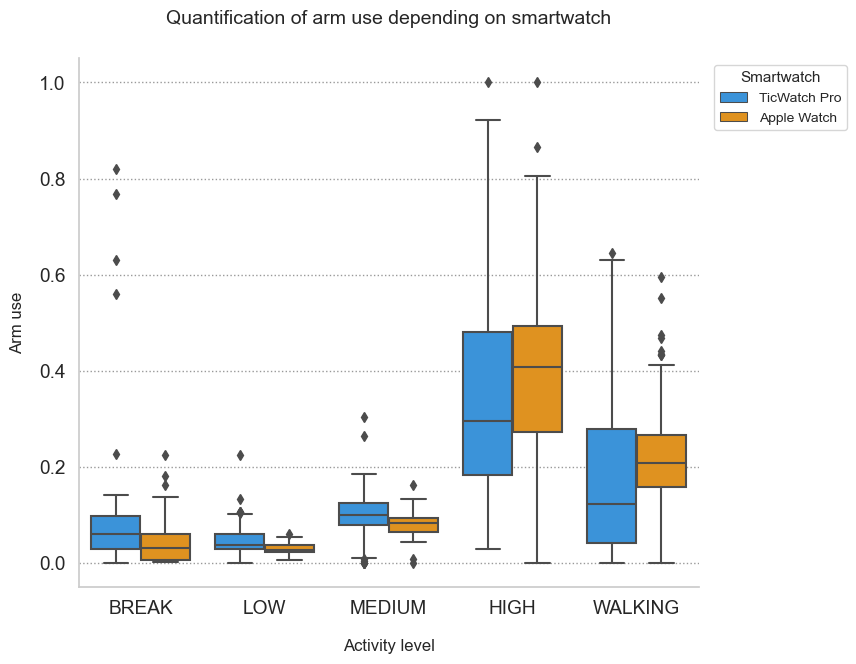

In [55]:
#GRAFICO
plt.figure(figsize=(8, 7), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#2196F3','#FF9800'] 

boxplot_arm_use = sb.boxplot(x='Activity level', y = 'normalized_a', data = DF_Android_vs_iOS_graf, hue = 'Smartwatch', order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors)
sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks
boxplot_arm_use.axes.set_title("Quantification of arm use depending on smartwatch", fontsize=14, y = 1.05)
boxplot_arm_use.set_xlabel("Activity level", labelpad = 15, fontsize=12)
boxplot_arm_use.set_ylabel("Arm use", labelpad = 10, fontsize=12)

plt.legend(title = "Smartwatch", fontsize = "10", title_fontsize = "11",bbox_to_anchor=(1.25, 1.0), loc = 'upper right')

#quantiles_Android_vs_iOS_acorrected = pd.DataFrame(DF_Android_vs_iOS_graf.groupby(['Activity level','Smartwatch'])['normalized_a'].quantile([0, 0.25,0.5,0.75,1]))
#quantiles_Android_vs_iOS_acorrected

### Comparing a_corrected between smartwatches

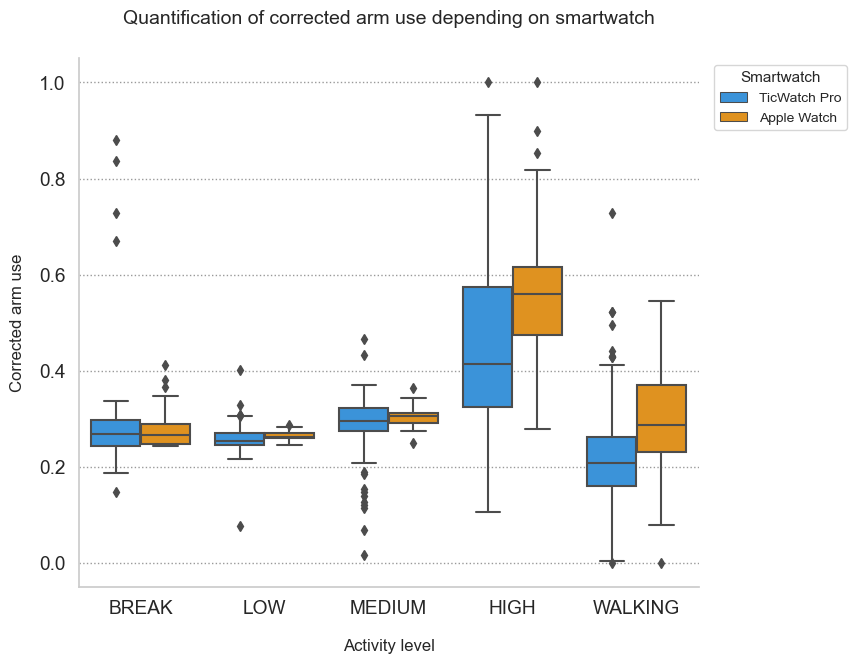

In [56]:
#GRAFICO
plt.figure(figsize=(8, 7), dpi = 100) # Define el tamaño del gráfico. Jugando con dpi y figsize se cambia el tamaño fuente de ejes y tamaño del gráfico
colors = ['#2196F3','#FF9800'] 

boxplot_arm_use = sb.boxplot(x='Activity level', y = 'normalized_a_corrected', data = DF_Android_vs_iOS_graf, hue = 'Smartwatch', order = ["BREAK","LOW","MEDIUM","HIGH","WALKING"], palette = colors)
sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks
boxplot_arm_use.axes.set_title("Quantification of corrected arm use depending on smartwatch", fontsize=14, y = 1.05)
boxplot_arm_use.set_xlabel("Activity level", labelpad = 15, fontsize=12)
boxplot_arm_use.set_ylabel("Corrected arm use", labelpad = 10, fontsize=12)

plt.legend(title = "Smartwatch", fontsize = "10", title_fontsize = "11",bbox_to_anchor=(1.25, 1.0), loc = 'upper right')

#quantiles_Android_vs_iOS_acorrected = pd.DataFrame(DF_Android_vs_iOS_graf.groupby(['Activity level','Smartwatch'])['normalized_a_corrected'].quantile([0, 0.25,0.5,0.75,1]))
#quantiles_Android_vs_iOS_acorrected

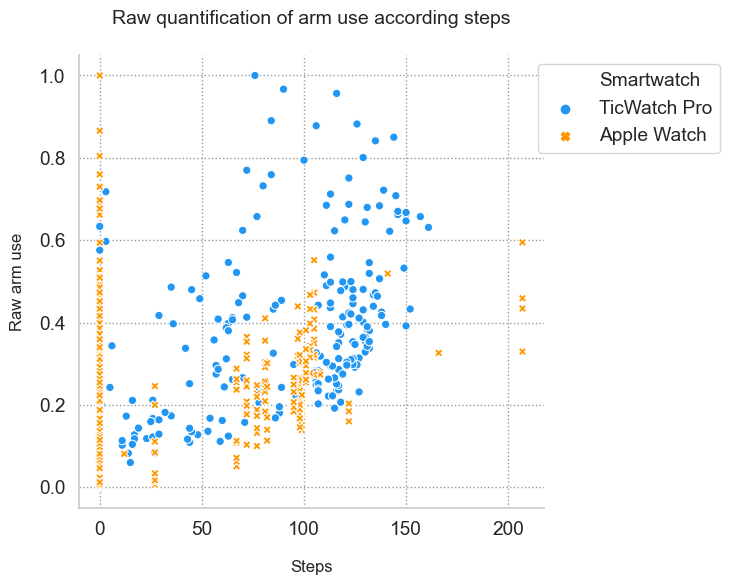

In [57]:
#GRÁFICO
colors = ['#2196F3','#FF9800'] 
plt.figure(figsize=(6, 6), dpi = 100)
scatter_Android_vs_iOS_a_raw = sb.scatterplot(x='s', y='normalized_a_raw', data = DF_Android_vs_iOS_graf ,hue='Smartwatch',hue_order = ["TicWatch Pro", "Apple Watch"], style = 'Smartwatch', style_order = ["TicWatch Pro", "Apple Watch"], palette = colors )

sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

scatter_Android_vs_iOS_a_raw.axes.set_title("Raw quantification of arm use according steps", fontsize=14, y = 1.05)
scatter_Android_vs_iOS_a_raw.set_xlabel("Steps",labelpad = 15, fontsize=12)
scatter_Android_vs_iOS_a_raw.set_ylabel("Raw arm use", labelpad = 10,fontsize=12)

#plt.setp(scatter_a_raw.get_legend().get_texts(), fontsize='11') # for legend text
plt.legend(bbox_to_anchor=(1.4, 1.0), loc = 'upper right') #title = "Smartwatch", fontsize = "10", title_fontsize = "11",

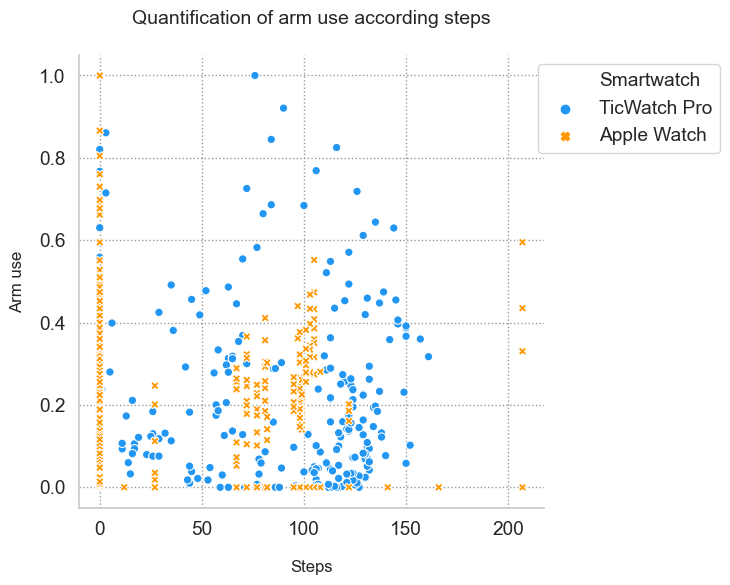

In [58]:
#GRÁFICO
colors = ['#2196F3','#FF9800'] 
plt.figure(figsize=(6, 6), dpi = 100)
scatter_Android_vs_iOS_a = sb.scatterplot(x='s', y='normalized_a', data = DF_Android_vs_iOS_graf ,hue='Smartwatch',hue_order = ["TicWatch Pro", "Apple Watch"], style = 'Smartwatch', style_order = ["TicWatch Pro", "Apple Watch"], palette = colors )

sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

scatter_Android_vs_iOS_a.axes.set_title("Quantification of arm use according steps", fontsize=14, y = 1.05)
scatter_Android_vs_iOS_a.set_xlabel("Steps",labelpad = 15, fontsize=12)
scatter_Android_vs_iOS_a.set_ylabel("Arm use", labelpad = 10,fontsize=12)

#plt.setp(scatter_a_raw.get_legend().get_texts(), fontsize='11') # for legend text
plt.legend(bbox_to_anchor=(1.4, 1.0), loc = 'upper right') #title = "Smartwatch", fontsize = "10", title_fontsize = "11",

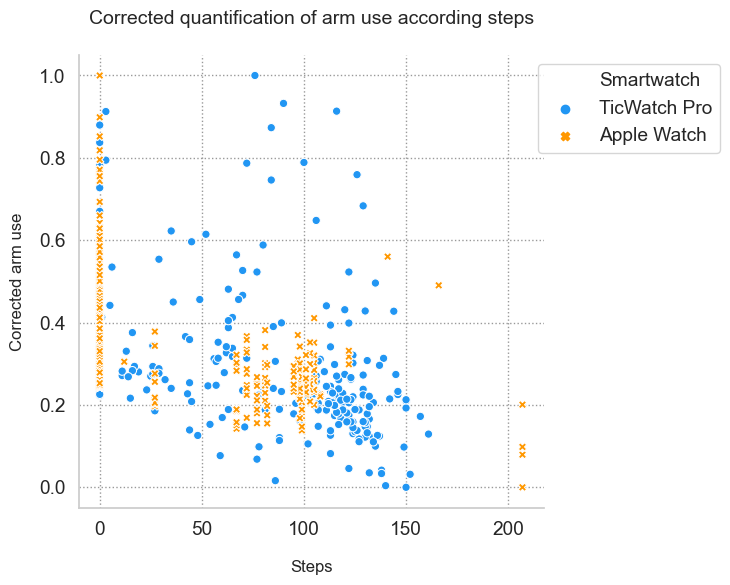

In [59]:
#GRÁFICO
colors = ['#2196F3','#FF9800'] 
plt.figure(figsize=(6, 6), dpi = 100)
scatter_Android_vs_iOS = sb.scatterplot(x='s', y='normalized_a_corrected', data = DF_Android_vs_iOS_graf ,hue='Smartwatch',hue_order = ["TicWatch Pro", "Apple Watch"], style = 'Smartwatch', style_order = ["TicWatch Pro", "Apple Watch"], palette = colors )

sb.despine(right = True, trim=False)
sb.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) #OPCIONES: darkgrid, whitegrid, dark, white, ticks

scatter_Android_vs_iOS.axes.set_title("Corrected quantification of arm use according steps", fontsize=14, y = 1.05)
scatter_Android_vs_iOS.set_xlabel("Steps",labelpad = 15, fontsize=12)
scatter_Android_vs_iOS.set_ylabel("Corrected arm use", labelpad = 10,fontsize=12)

#plt.setp(scatter_a_raw.get_legend().get_texts(), fontsize='11') # for legend text
plt.legend(bbox_to_anchor=(1.4, 1.0), loc = 'upper right') #title = "Smartwatch", fontsize = "10", title_fontsize = "11",

In [60]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(DF_Android_vs_iOS_graf['normalized_a_raw'])
shapiro_test

ShapiroResult(statistic=0.8789076805114746, pvalue=3.159086679151971e-25)

In [61]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(DF_Android_vs_iOS_graf['normalized_a'])
shapiro_test

ShapiroResult(statistic=0.8268747925758362, pvalue=2.2843154143823194e-29)

In [62]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(DF_Android_vs_iOS_graf['normalized_a_corrected'])
shapiro_test

ShapiroResult(statistic=0.8419668078422546, pvalue=2.798865154659285e-28)

In [63]:
# Voy a separar los datos según activity level para trabajar de una manera más sencilla

#Datos de break
DF_normalized_Android_break0 = DF_Android_completed_normalize[DF_Android_completed_normalize['Activity level'] == 0]

# Datos de actividad leve
DF_normalized_Android_lowlevel1 = DF_Android_completed_normalize[DF_Android_completed_normalize['Activity level'] == 1]

# Datos de actividad media
DF_normalized_Android_mediumlevel2 = DF_Android_completed_normalize[DF_Android_completed_normalize['Activity level'] == 2]

#Datos de actividad alta
DF_normalized_Android_highlevel3 = DF_Android_completed_normalize[DF_Android_completed_normalize['Activity level'] == 3]

#Datos de caminata
DF_normalized_Android_onlywalking4 = DF_Android_completed_normalize[DF_Android_completed_normalize['Activity level'] == 4]

#===========================================iOS===========================

# Voy a separar los datos según activity level para trabajar de una manera más sencilla

#Datos de break
DF_normalized_iOS_break0 = DF_iOS_completed_normalize[DF_iOS_completed_normalize['Activity level'] == 0]

# Datos de actividad leve
DF_normalized_iOS_lowlevel1 = DF_iOS_completed_normalize[DF_iOS_completed_normalize['Activity level'] == 1]

# Datos de actividad media
DF_normalized_iOS_mediumlevel2 = DF_iOS_completed_normalize[DF_iOS_completed_normalize['Activity level'] == 2]

#Datos de actividad alta
DF_normalized_iOS_highlevel3 = DF_iOS_completed_normalize[DF_iOS_completed_normalize['Activity level'] == 3]

#Datos de caminata
DF_normalized_iOS_onlywalking4 = DF_iOS_completed_normalize[DF_iOS_completed_normalize['Activity level'] == 4]

In [64]:
q75, q25 = np.percentile(DF_normalized_iOS_mediumlevel2['normalized_a_raw'], [75 ,25])
iqr = q75 - q25
iqr

0.028759549341789203

In [65]:
q75, q25 = np.percentile(DF_normalized_iOS_mediumlevel2['normalized_a'], [75 ,25])
iqr = q75 - q25
iqr

0.02884237873862465

In [66]:
q75, q25 = np.percentile(DF_normalized_iOS_mediumlevel2['normalized_a_corrected'], [75 ,25])
iqr = q75 - q25
iqr

0.02175570437951979

In [67]:
q75, q25 = np.percentile(DF_normalized_iOS_lowlevel1['normalized_a_raw'], [75 ,25])
iqr = q75 - q25
iqr

0.014750838817430563

### Statistics

In [68]:
# Break
print ('a_raw in break : ', stats.mannwhitneyu(DF_normalized_Android_break0['normalized_a_raw'],DF_normalized_iOS_break0['normalized_a_raw']))
print ('a in break : ', stats.mannwhitneyu(DF_normalized_Android_break0['normalized_a'],DF_normalized_iOS_break0['normalized_a']))
print ('a_corrected in break : ', stats.mannwhitneyu(DF_normalized_Android_break0['normalized_a_corrected'],DF_normalized_iOS_break0['normalized_a_corrected']))

# Low
print ('a_raw in low act : ', stats.mannwhitneyu(DF_normalized_Android_lowlevel1['normalized_a_raw'],DF_normalized_iOS_lowlevel1['normalized_a_raw']))
print ('a in low act : ', stats.mannwhitneyu(DF_normalized_Android_lowlevel1['normalized_a'],DF_normalized_iOS_lowlevel1['normalized_a']))
print ('a_corrected in low act : ', stats.mannwhitneyu(DF_normalized_Android_lowlevel1['normalized_a_corrected'],DF_normalized_iOS_lowlevel1['normalized_a_corrected']))

# Medium
print ('a_raw in medium: ', stats.mannwhitneyu(DF_normalized_Android_mediumlevel2['normalized_a_raw'],DF_normalized_iOS_mediumlevel2['normalized_a_raw']))
print ('a in medium act: ', stats.mannwhitneyu(DF_normalized_Android_mediumlevel2['normalized_a'],DF_normalized_iOS_mediumlevel2['normalized_a']))
print ('a_corrected in medium act : ', stats.mannwhitneyu(DF_normalized_Android_mediumlevel2['normalized_a_corrected'],DF_normalized_iOS_mediumlevel2['normalized_a_corrected']))

# High
print ('a_raw in high act: ', stats.mannwhitneyu(DF_normalized_Android_highlevel3['normalized_a_raw'],DF_normalized_iOS_highlevel3['normalized_a_raw']))
print ('a in high act: ', stats.mannwhitneyu(DF_normalized_Android_highlevel3['normalized_a'],DF_normalized_iOS_highlevel3['normalized_a']))
print ('a_corrected in high act: ', stats.mannwhitneyu(DF_normalized_Android_highlevel3['normalized_a_corrected'],DF_normalized_iOS_highlevel3['normalized_a_corrected']))

# Walking
print ('a_raw in walking: ', stats.mannwhitneyu(DF_normalized_Android_onlywalking4['normalized_a_raw'],DF_normalized_iOS_onlywalking4['normalized_a_raw']))
print ('a in walking: ', stats.mannwhitneyu(DF_normalized_Android_onlywalking4['normalized_a'],DF_normalized_iOS_onlywalking4['normalized_a']))
print ('a_corrected in walking: ', stats.mannwhitneyu(DF_normalized_Android_onlywalking4['normalized_a_corrected'],DF_normalized_iOS_onlywalking4['normalized_a_corrected']))

a_raw in break :  MannwhitneyuResult(statistic=736.5, pvalue=1.13624904729678e-06)
a in break :  MannwhitneyuResult(statistic=1016.0, pvalue=0.0009441143295026632)
a_corrected in break :  MannwhitneyuResult(statistic=1491.0, pvalue=0.3618106470015126)
a_raw in low act :  MannwhitneyuResult(statistic=1462.0, pvalue=0.0005992989333220135)
a in low act :  MannwhitneyuResult(statistic=1230.0, pvalue=8.68863281930226e-06)
a_corrected in low act :  MannwhitneyuResult(statistic=1456.0, pvalue=0.0005443353930955447)
a_raw in medium:  MannwhitneyuResult(statistic=1201.0, pvalue=7.3715655379888895e-06)
a in medium act:  MannwhitneyuResult(statistic=1489.5, pvalue=0.0013338863638002903)
a_corrected in medium act :  MannwhitneyuResult(statistic=1843.0, pvalue=0.08455563039677433)
a_raw in high act:  MannwhitneyuResult(statistic=2032.0, pvalue=0.21215658459004583)
a in high act:  MannwhitneyuResult(statistic=1837.0, pvalue=0.04680112576408004)
a_corrected in high act:  MannwhitneyuResult(statistic=

# Conclusion: sample distributions are not equal. The p-value strongly suggests that the sample distributions are different, as is expected.

## Break en a_corrected (p=0.36): no differences
## Medium en a_corrected (p=0.08): no differences
## High in a_raw (0.21): no differences

# En todas las demás hay diferencias